In [1]:
import pandas as pd
import numpy as np
from functions import *
import matplotlib.pyplot as plt

d = r'C:/Users/fabrizio/Documents/R_data/PROJECTS/MASTER/DATA/KKA Kärnten NEU.xlsx'

data, trial = reader(d, 'Data K', header=15, test=False)



In [2]:
data=cleaner(data, ['Unnamed: 0','Unnamed: 1','Unnamed: 8','Bautyp','mech.','biol. ','chem.','Urkunde','Von.1','Lageplan','Anmerkungen',1,2,3,4,5,6,7,8,9,10,11,12,13,'Unnamed: 35','KKA','Kl. KA','?','Unnamed: 38'])
data.dropna(how='all', inplace=True, axis=0, thresh=10)



In [3]:
data['Kat.']

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
7273     1.0
7274    13.0
7275     4.0
7276     5.0
7277    12.0
Name: Kat., Length: 7276, dtype: float64

In [4]:
conditions_tech=[
    data['Kat.'] == 1,
    data['Kat.'] == 2,
    data['Kat.']== 3,
    data['Kat.'] == 4,
    data['Kat.'] == 5,
    data['Kat.'] == 6,
    data['Kat.'] == 7,
    data['Kat.']== 8,
    data['Kat.']== 9,
    data['Kat.']== 10,
    data['Kat.']== 11,
    data['Kat.']== 12,
    data['Kat.']== 13
]

outcome_tech = ['3-k', 'Filtersack','Kompost', 'Bel.', 'SBR', 'MBR', 'Tropf', 'RBC', 
                    'Fest', 'Wirbel', 'BKF', 'PKA','Unbekannt']

In [5]:
data=logical_column(conditions_tech, outcome_tech, data,'tech_type')

<AxesSubplot:>

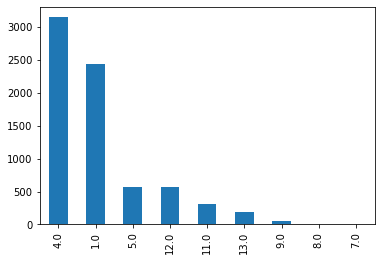

In [6]:
data['Kat.'].value_counts().plot(kind='bar')


<AxesSubplot:>

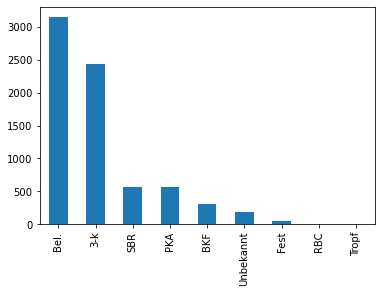

In [7]:
data['tech_type'].value_counts().plot(kind='bar')

In [8]:
data.rename(columns={'Unnamed: 6':'KG_name'},inplace=True)

data.tech_type.value_counts()
data[data.KG_name.isna()]

#data.to_excel('output/Karn.xlsx',index=False)

,Postzahl,Bezirk,Gemeinde,KG,KG_name,Von,Bis,EW 60,m³/d,l/s,Kat.,EW60 / m³/d,EW60 / l/s (10h),tech_type
716,204/3869,204.0,20441.0,NaN,NaN,1992,2002,6.666667,1,NaN,4.0,150.0,0.0,Bel.
717,204/3868,204.0,20405.0,NaN,NaN,1992,2002,10.666667,1.6,NaN,4.0,150.0,0.0,Bel.
718,204/3866,204.0,20414.0,NaN,NaN,1992,1997,4,0.6,NaN,4.0,150.0,0.0,Bel.
720,204/3861,204.0,20421.0,NaN,NaN,1991,2006,6.666667,1,NaN,4.0,150.0,0.0,Bel.
721,204/3858,204.0,20403.0,NaN,NaN,1987,unbefristet,5.333333,0.8,NaN,4.0,150.0,0.0,Bel.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,209/3356,209.0,20913.0,NaN,NaN,1988,unbefristet,10.666667,1.6,NaN,13.0,150.0,0.0,Unbekannt
5888,209/3299,209.0,20918.0,NaN,NaN,1976,unbefristet,30,4.5,NaN,1.0,150.0,0.0,3-k
5891,209/3289,209.0,20909.0,NaN,NaN,1987,unbefristet,5.333333,0.8,NaN,1.0,150.0,0.0,3-k
5908,209/3252,209.0,20914.0,NaN,NaN,1986,unbefristet,5.333333,0.8,NaN,1.0,150.0,0.0,3-k


In [11]:
data[data.Gemeinde==20201]

,Postzahl,Bezirk,Gemeinde,KG,KG_name,Von,Bis,EW 60,m³/d,l/s,Kat.,EW60 / m³/d,EW60 / l/s (10h),tech_type
11,202/96,202.0,20201.0,75415.0,Gratschach,1953,unbefristet,?,?,?,1.0,NaN,NaN,3-k
12,202/78,202.0,20201.0,75421.0,Judendorf,1970,1975,36,NaN,NaN,1.0,0.000000,0.0,3-k
13,202/77,202.0,20201.0,75421.0,Judendorf,1971,1976,?,?,?,1.0,NaN,NaN,3-k
14,202/73,202.0,20201.0,75421.0,Judendorf,1968,1973,14,NaN,NaN,1.0,0.000000,0.0,3-k
15,202/490,202.0,20201.0,75415.0,Gratschach,2008,2018,30,4.5,NaN,4.0,150.000000,0.0,Bel.
16,202/385,202.0,20201.0,75421.0,Judendorf,2002,2028,15,2.25,NaN,4.0,150.000000,0.0,Bel.
17,202/349,202.0,20201.0,75434.0,Pogöriach,1999,2024,10.666667,1.6,NaN,4.0,150.000000,0.0,Bel.
18,202/339,202.0,20201.0,75459.0,Wollanig,1999,2024,20,3,NaN,4.0,150.000000,0.0,Bel.
19,202/338,202.0,20201.0,75421.0,Judendorf,1999,2024,10,1.5,NaN,4.0,150.000000,0.0,Bel.
20,202/325,202.0,20201.0,75429.0,Maria Gail,1996,2009,6.666667,1,NaN,4.0,150.000000,0.0,Bel.
